# <center>K-Vecinos Más Cercanos</center>

Imagina un proveedor de telecomunicaciones que ha segmentado la base de sus clientes por servicio, categorizando a los clientes en cuatro grupos. Si los datos demográficos se pueden usar para predecir la pertenencia de grupo del envío, la compañía podría personalizar las ofertas para los prospectos. Es un problema de clasificación. O sea, dado un set de datos, con etiquetas predefinidas, necesitaremos construir un modelo para predecir la clase de un nuevo o desconocido caso.

Este ejemplo hace foco en datos demográficos, sean region, edad, estado civil, para predecir patrones de uso.

El campo objetivo (target), llamado **custcat**, tiene cuatro valores posibles que corresponden a los cuatro grupos de clientes, a saber:
1- Servicio Básico
2- E-Servicio
3- Servicio Plus
4- Servicio Total

Nuestro objetivo es construir un clasificador para predecir la clase de casos desconocidos. Utilizaremos un tipo específico de clasificación llamado K vecino más cercano.


In [92]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
df = pd.read_csv('../Datasets/teleCust1000t.csv', sep = ',')

In [94]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [95]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [96]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot: title={'center': 'income'}>]], dtype=object)

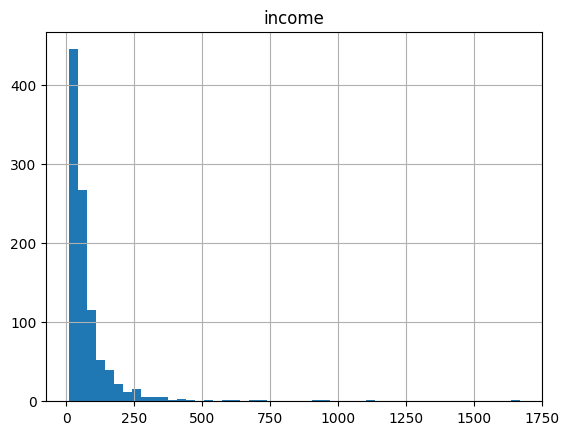

In [97]:
df.hist(column= 'income', bins = 50)

Seleccionamos las Features

In [98]:
X = df.drop(columns = 'custcat', axis = 1).values
y = df['custcat'].values

In [99]:
#Escalamos los datos
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()

In [100]:
X = StandardScaler().fit(X).transform(X.astype(float))

Dividimos Data En train y test

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state= 42)

In [102]:
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (700, 11) (700,)
Set de Prueba: (300, 11) (300,)


### Importamos el Modelo y fiteamos el modelo

In [103]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

#### Predecimos

In [104]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#### Evaluamos 

In [105]:
from sklearn.metrics import accuracy_score
print("Entrenar el set de Certeza: ", accuracy_score(y_train, y_train_pred))
print("Probar el set de Certeza: ", accuracy_score(y_test, y_test_pred))

Entrenar el set de Certeza:  0.5585714285714286
Probar el set de Certeza:  0.3233333333333333


## Práctica

¿Puedes construir el modelo nuevamente, pero esta vez con k=6?

In [106]:
clf = KNeighborsClassifier(n_neighbors= 4)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [107]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Entrenar el set de Certeza: ", accuracy_score(y_train, clf.predict(X_train)))
print("Probar el set de Certeza: ", accuracy_score(y_test, y_test_pred))

Entrenar el set de Certeza:  0.5585714285714286
Probar el set de Certeza:  0.3233333333333333


#### Probamos el algoritmo con distintos valores de K

In [108]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []
for n in range(1,Ks):
    
    #Entrenar el Modelo y Predecir  
    clf = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_test_pred=clf.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, y_test_pred)

    
    std_acc[n-1]=np.std(y_test_pred==y_test)/np.sqrt(y_test_pred.shape[0])

mean_acc

array([0.29      , 0.3       , 0.32666667, 0.32333333, 0.33      ,
       0.35666667, 0.36      , 0.33333333, 0.33666667])

### Visualizamos

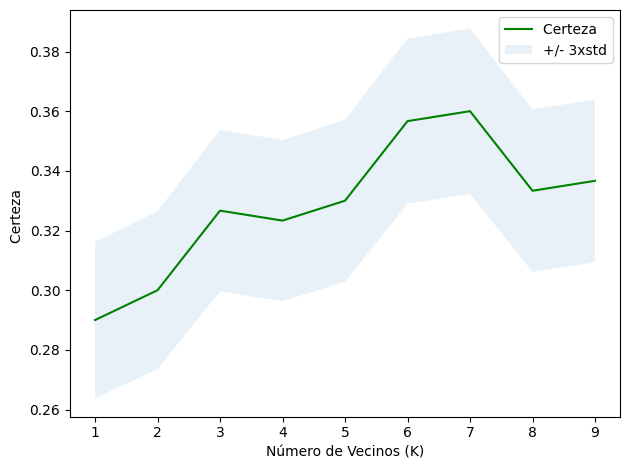

In [109]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

In [110]:
print( "La mejor aproximación de certeza fue con ", mean_acc.max(), "con k=", mean_acc.argmax()+1) 

La mejor aproximación de certeza fue con  0.36 con k= 7
